<a href="https://colab.research.google.com/github/garthajon/QuantFinanceIntro/blob/main/ZSCORE_TRACKING_WEEKLY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1761068350.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start=start_date, end=end_date, progress=False)['Close']


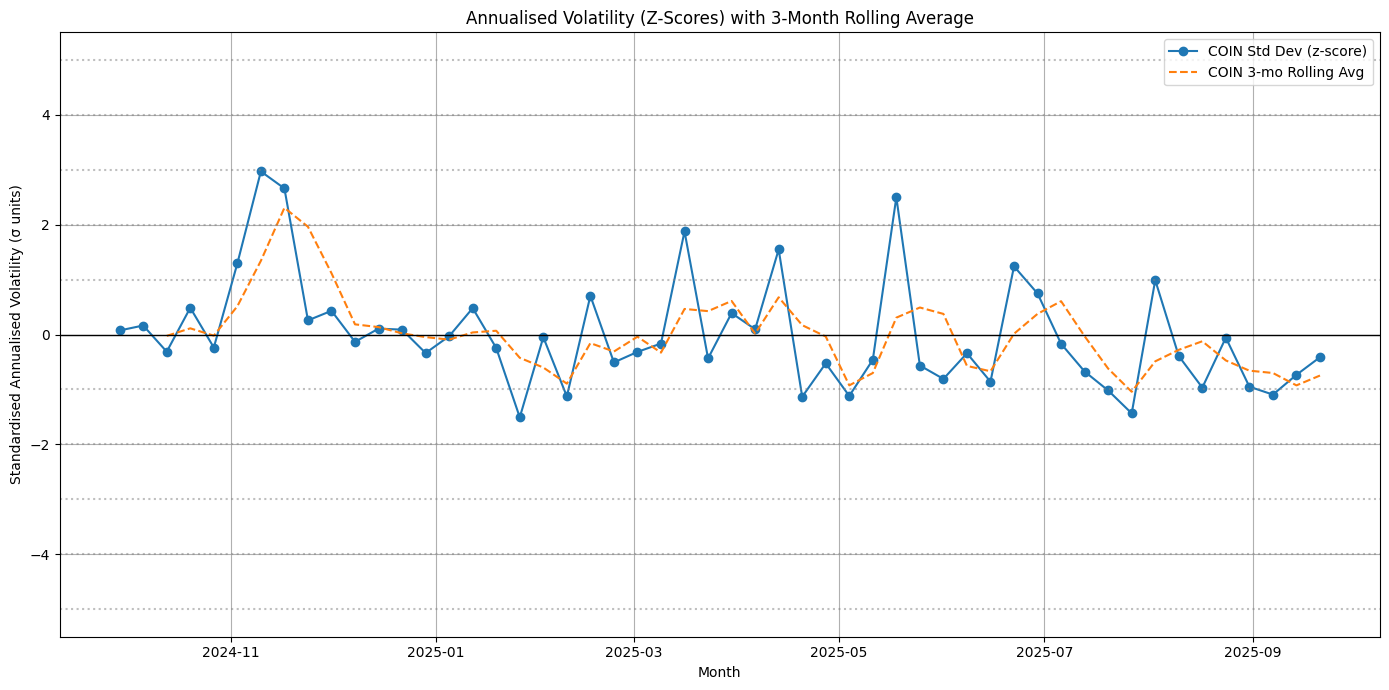

In [6]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parameters
#tickers = ['COIN', 'TSLA']
#tickers = ['COIN']
tickers = ['COIN']
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(years=1)  # 2 years of data

# Fetch daily data
df = yf.download(tickers, start=start_date, end=end_date, progress=False)['Close']

# Compute daily returns
returns = df.pct_change().dropna()

# Resample to monthly std dev of daily returns, then annualise
monthly_std = returns.resample('W').std() * np.sqrt(12)

# Standardise each ticker's monthly annualised std dev
standardised = pd.DataFrame(index=monthly_std.index)
for ticker in tickers:
    mu = monthly_std[ticker].mean()
    sigma = monthly_std[ticker].std()
    standardised[ticker] = (monthly_std[ticker] - mu) / sigma

# Rolling 3-month average of standardised values
rolling_avg3 = standardised.rolling(window=3, min_periods=3).mean()

# Plot
plt.figure(figsize=(14,7))

for ticker in tickers:
    plt.plot(standardised.index, standardised[ticker], marker='o', label=f'{ticker} Std Dev (z-score)')
    plt.plot(rolling_avg3.index, rolling_avg3[ticker], linestyle='--', label=f'{ticker} 3-mo Rolling Avg')

# Mean line at 0
plt.axhline(0, color='black', linestyle='-', linewidth=1)

# ±1σ … ±5σ reference lines
for k in range(1,6):
    plt.axhline(k, color='grey', linestyle=':', alpha=0.5)
    plt.axhline(-k, color='grey', linestyle=':', alpha=0.5)

# Formatting
plt.title('Annualised Volatility (Z-Scores) with 3-Month Rolling Average')
plt.xlabel('Month')
plt.ylabel('Standardised Annualised Volatility (σ units)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
